### This research notebook is part of DAMI II course at DSV

### Authors: © 2022 Martin Masaba & Edda Waciira

# Customer Data Exploration

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
customers_df = pd.read_csv(r"C:\Users\AdminPC\Edda Stuff\Edda Data Scientist\Python Projects\datasets\customers.csv")

In [3]:
customers_df.head(15)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [5]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [6]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [7]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [8]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
None              2
Name: fashion_news_frequency, dtype: int64

In [9]:
customers_df['fashion_news_frequency'].replace('None', np.nan, inplace=True)

In [10]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
Name: fashion_news_frequency, dtype: int64

In [11]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [12]:
customers_df = customers_df.dropna(subset =['fashion_news_frequency'])

In [13]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', 'Monthly'], dtype=object)

In [14]:
customers_df.isnull().sum()

customer_id                    0
FN                        789740
Active                    802113
club_member_status             0
fashion_news_frequency         0
age                         6168
postal_code                    0
dtype: int64

In [15]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))


The average age is 36.067268231084924, the max age is 99.0 and the min age is 16.0


<AxesSubplot:title={'center':'Customers Ages'}, xlabel='Age Bins', ylabel='Count'>

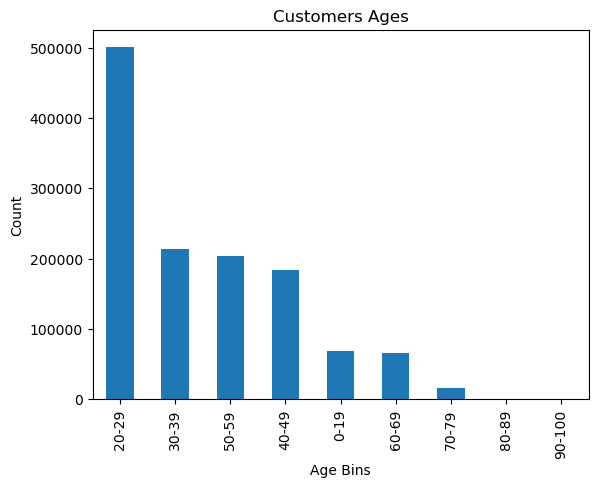

In [16]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'bar', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')


In [17]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.701991
30-39,16.920045
50-59,16.194259
40-49,14.584027
0-19,5.516975
60-69,5.223059
70-79,1.264117
80-89,0.099797
90-100,0.006426


In [18]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [19]:
customers_df.age_bins.value_counts()

20-29     447303
30-39     213288
40-49     183841
0-19           0
50-59          0
60-69          0
70-79          0
80-89          0
90-100         0
Name: age_bins, dtype: int64

In [20]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [21]:
customers_df.isnull().sum()

customer_id                    0
FN                        547750
Active                    556125
club_member_status             0
fashion_news_frequency         0
age                         6168
dtype: int64

###### According to the owner of the dataset, 'FN' is if a customer get Fashion News newsletter, 'Active' is if the customer is active for communication.
See more [here](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001)

As such, the value 1.0 in these two columns can be interpreted as 'true' and as such, np.nan can be intepreted as 'false'.

Therefore, these values can be replaced with 0

In [22]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [23]:
customers_df.FN.value_counts()

0.0    547750
1.0    302850
Name: FN, dtype: int64

In [24]:
customers_df.Active.value_counts()

0.0    556125
1.0    294475
Name: Active, dtype: int64

In [25]:
customers_df.isnull().sum()

customer_id                  0
FN                           0
Active                       0
club_member_status           0
fashion_news_frequency       0
age                       6168
dtype: int64

###### Only the 'column' has nan values now and since they are not many, it is possible to drop these rows

In [26]:
customers_df = customers_df.dropna(subset =['age'])

In [27]:
customers_df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

### Scaling Numeric Columns

There are three numerical columns (FN, Active & age). But FN and Active have 1 and 0 values representing truth or false.

As such, only age should be scaled. Below we check the dristribution of age so as to decide the best sclaing method to use.

In [28]:
customers_df['age'].describe()

count    844432.000000
mean         31.333135
std           8.536422
min          21.000000
25%          24.000000
50%          29.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

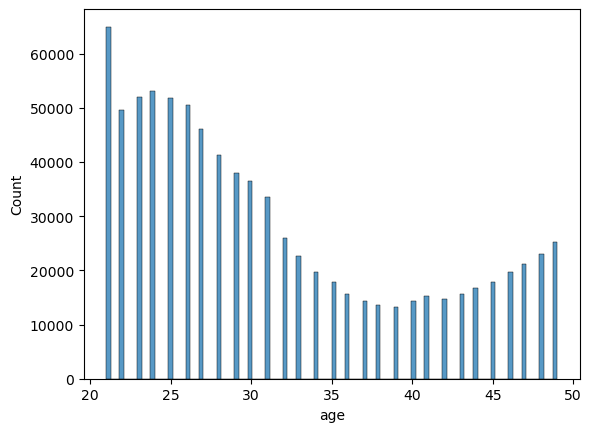

In [29]:
sns.histplot(customers_df['age'])

<AxesSubplot:ylabel='Density'>

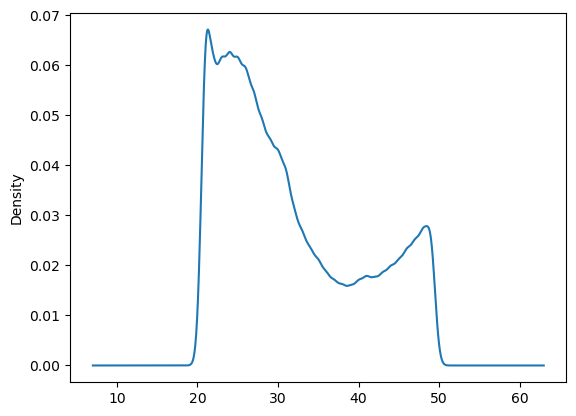

In [30]:
customers_df['age'].plot(kind='kde')

In [31]:
#No normal distribution in age column
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
age_col = customers_df[['age']]

age_col.shape

(844432, 1)

In [34]:
scaler.fit(age_col)
age_scaled = scaler.transform(age_col)

In [35]:
age_scaled.shape

(844432, 1)

In [36]:
customers_df = customers_df.assign(age_scaled=age_scaled)

In [37]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714
...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000


In [38]:
categorical_cols = ['club_member_status', 'fashion_news_frequency']

In [39]:
categorical_cols

['club_member_status', 'fashion_news_frequency']

### Encoding Categorical Data

In [40]:
customers_df[categorical_cols].nunique()

club_member_status        1
fashion_news_frequency    3
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [43]:
encoder.fit(customers_df[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['club_member_status_ACTIVE', 'fashion_news_frequency_Monthly', 'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly']


In [45]:
customers_df[encoded_cols] = encoder.transform(customers_df[categorical_cols])

In [46]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled,club_member_status_ACTIVE,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000,1.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857,1.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857,1.0,0.0,0.0,1.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714,1.0,0.0,0.0,1.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000,1.0,0.0,0.0,1.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000,1.0,0.0,1.0,0.0


In [49]:
customers_num_df = customers_df[['FN', 'Active','age_scaled','fashion_news_frequency_Monthly','fashion_news_frequency_NONE','fashion_news_frequency_Regularly']]

In [50]:
customers_num_df.corr()


,FN,Active,age_scaled,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
FN,1.000000,0.978589,0.018760,0.032688,-0.994511,0.993181
Active,0.978589,1.000000,0.020216,0.031154,-0.974137,0.972880
age_scaled,0.018760,0.020216,1.000000,0.004650,-0.018578,0.018341
fashion_news_frequency_Monthly,0.032688,0.031154,0.004650,1.000000,-0.033770,-0.018852
fashion_news_frequency_NONE,-0.994511,-0.974137,-0.018578,-0.033770,1.000000,-0.998615
fashion_news_frequency_Regularly,0.993181,0.972880,0.018341,-0.018852,-0.998615,1.000000


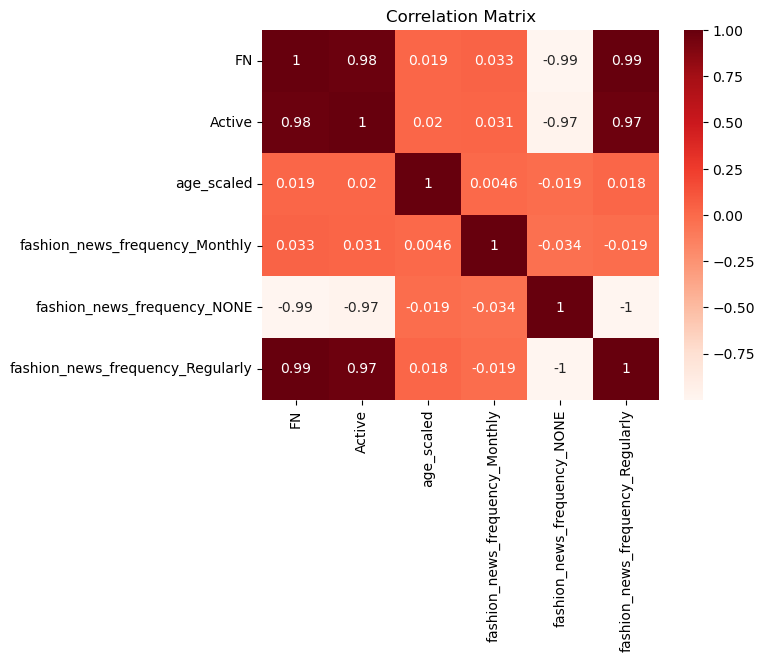

In [51]:
sns.heatmap(customers_num_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlation Matrix');